# Assignment 2

This assignment walks you through the basics of the perceptron. You will also do some first experiments on a toy data set, and check the effect of hyperparameters. The intended goal of the assignment is to familiarize you further with the Jupyter/Colab environment and help you acquire some tools that we will later use to experiment with 'professional-grade' data sets and algorithms. 


<b>Note: </b> You must run/evaluate all cells. <b>Order of cell execution is important.<b>

## Preparation Steps

In [ ]:
# Import all necessary python packages
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# ### Reading-in the Iris data

s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases', 'iris','iris.data')
s = s.replace("\\","/");
print('URL:', s)
df = pd.read_csv(s,header=None,encoding='utf-8')


URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


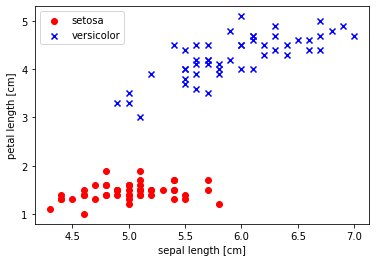

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

## <font color = 'blue'>  Question 0. Manual Perceptron Training 
</font>


max score: 4 <br>

Notes to grader: <br>
No coding is required as long as the result and steps taken are as follows. Coding answer is okay as well. 

Below you can see the first 5 data points of the data set, all labeled as 'setosa'. 

In [ ]:
X[0:5], y[0:5]

(array([[5.1, 1.4],
        [4.9, 1.4],
        [4.7, 1.3],
        [4.6, 1.5],
        [5. , 1.4]]), array([-1, -1, -1, -1, -1]))

Suppose the initial weights of the perceptron are w0=0.1, w1=0.2, w2=-0.1

In the following space (Double click this text), write the weights after processing data points 0,1,2, and show your calculations (with $\eta = 0.1$):

 



<br>
<br>
<br><br><br><br>












### 

In [ ]:
# List out what we know
eta = 0.1 # learning rate
w = np.array([0.1,0.2,-0.1]) # w0=0.1, w1=-0.2, w2=0.1
y_label = -np.ones(5) # force y label to be all 1 as the instruction in the addendum

$update = \eta * (y - \hat{y})$ where $y$ is the expected label and $\hat{y}$ is what the neuron has predicted

In [ ]:
# obtain y hat for the first data point
dp = 0
x_1 = X[dp][0]
x_2 = X[dp][1]

y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
y_hat = np.where(y_net_input>=0.0,1,-1)

#Update the weight for the first data point
update = eta * (y_label[dp] - y_hat)
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
w

array([-0.1 , -0.82, -0.38])

In [ ]:
# obtain y hat for the 2nd data point
dp = 1
x_1 = X[dp][0]
x_2 = X[dp][1]

y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
y_hat = np.where(y_net_input>=0.0,1,-1)

#Update the weight for the first data point
update = eta * (y_label[dp] - y_hat)
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
w

array([-0.1 , -0.82, -0.38])

In [ ]:
# obtain y hat for the 3rd data point
dp = 2
x_1 = X[dp][0]
x_2 = X[dp][1]

y_net_input = w[0] + w[1]*x_1 + w[2]*x_2
y_hat = np.where(y_net_input>=0.0,1,-1)

#Update the weight for the first data point
update = eta * (y_label[dp] - y_hat)
w[0] += update
w[1] += update * x_1
w[2] += update * x_2
w

array([-0.1 , -0.82, -0.38])

## <font color = 'blue'> Question 1. Perceptron Code Modification </font>

max score: 12

Note to grader: In (i) you should see some simple logic that check if no errors was found in the last epech, and exit in that case. Part (ii) should be a simple additional attribute. Part (iii) is optional. It is a bit trickier, it requires a 'deepcopy' to work. 


The following code is the perceptron implementation from the textbook (with only three lines inserted).

In [ ]:
import numpy as np
import copy

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    ## grader note: the following solution uses an additional init_weight attribute
    ## this is optional

    def __init__(self, eta=0.01, n_iter=50, random_state=1, init_weight=[]):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

        # to force some preset init weight vector
        self.init_weight = init_weight

     
        # the number of iterations required to converge 
        # it will take the default value = -1
        # grader note: something similar is needed in the solution
        self.iter_trained = -1
        


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        if len(self.init_weight)>0:
            self.w_ = self.init_weight
        else:
            rgen = np.random.RandomState(self.random_state)
            self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # **** (iii)  solution here
        # weight vector over time. A dictionary that will have the key to be the iteration number and the value to be the list of weights after processing each data point
        self.wo_ = {} 
        
        for i in range(self.n_iter):
            errors = 0
            # initiate the list of weight over each data point
            self.wo_[i] = []

            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update

                # **** check this: deep copy is required
                # use deep copy to ensure variable is saved by value for historical weight
                self.wo_[i].append(copy.deepcopy(self.w_))
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
            # **** (i) solution here
            # check to see if during the epoch, if there is any weight change/error.
            # if there is no error, we can break out of the loop since no
            # futher training iteration is necessary
            if errors == 0:
                # (ii) number of iterations for complete training
                # add 1 because python index start from 0
                self.iter_trained = i + 1
                break # end early
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

 
Work on the above cell and modify the code so that:

(i) The fit function stops when no more iterations are necessary. <br>
(ii) The trained perceptron contains not only its weights, but also the number of iterations it took for training <br>
(iii) The perceptron maintains a history of its weights, i.e. the set of weights after each point is processed (**optional** -- but you can use this to verify your manual calculations) 

To modify the code please insert your code with clear comments surrounding it, similarly to "my do-nothing code". Make sure you evaluate the cell again,  so that following cells will be using the modified perceptron.



In [ ]:
# optional: Verify manual calculations
# set the parameters to match question
test = Perceptron(eta = 0.1, init_weight=[0.1,0.2,-0.1])
test.fit(X[0:5],y_label)

In [ ]:
test.wo_[0][0:5]
# Results work in the same way when we do it manually

[[-0.1, -0.8200000000000001, -0.38],
 [-0.1, -0.8200000000000001, -0.38],
 [-0.1, -0.8200000000000001, -0.38],
 [-0.1, -0.8200000000000001, -0.38],
 [-0.1, -0.8200000000000001, -0.38]]

## <font color = 'blue'>  Question 2: Experimenting with hyperparameters </font>

max score: 12

Grader Note:
In part (i), the fastest way to find that value is by doing binary search (4 points) as the solution shows. It is also possible to do a linear search where many possible values are tried by small increments (3.5 points). 



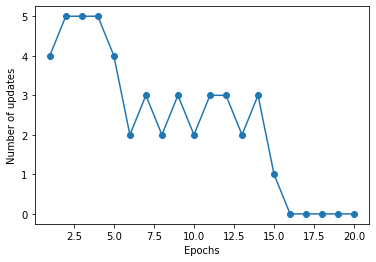

In [ ]:

ppn = Perceptron(eta=0.0001, n_iter=20, random_state=1)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


plt.show()







Running the above code, you can verify if your modification in question 1 works correctly. The point of this question is to experiment with the different hyperparameters. Here are some specific questions:<br>
(i) Find the largest value of $\eta$ for which the process takes more than 20 iterations to converge. Explain how you found that $\eta$ <br>
(ii) Are you able to find $\eta>1$ for which the process fails to converge in less than 30 iterations? <br>
(iii) Find two different settings for the random state, that give different convergence patterns, for the same $\eta$. 

Please give your answers in the cell below. 

<br>Double click here to type your answer
<br>
<br>
<br>
<br>

In [ ]:
# (i) intuition: the smaller the eta, the more slowly the perceptron will learn. 
# We see that eta = 0.0001, it takes 16 epochs (i.e. iterations) to learn
# in addition, we try out eta = 0.00001, it takes 40 epochs to learn
ppn = Perceptron(eta=0.00001, n_iter=200, random_state=1)

ppn.fit(X, y)
ppn.iter_trained

40

In [ ]:

# based on the above intuition and observation, we will use binary search to search for the eta that will produce ppn.iter_trained = 20
# eta producing high number of iterations to converge (40)
eta_low = 0.00001
# eta producing low nmber of iterations to converge (16)
eta_high = 0.0001
# find the middle value of eta_high and eta_low
mid = (eta_high + eta_low)/2 
# try out eta = mid to see how many epochs to learn successfully
ppn = Perceptron(eta=mid, n_iter=200, random_state=1)

ppn.fit(X, y)
print('The number of iterations required for eta mid = {:.6f} is {}'.format(mid,ppn.iter_trained))

# we see that the total number of epochs is 19, which means we need to decrease our learning rate a little less
# so that the perceptron will learn more slowly. 

The number of iterations required for eta mid = 0.000055 is 19


In [ ]:
# the current eta_high that needs 16 iterations
# the new eta_low needs 22 iterations
eta_high = mid
# find the middle value of eta_high and eta_low
mid = (eta_high + eta_low)/2
# try out eta = mid to see how many epochs to learn successfully
ppn = Perceptron(eta=mid, n_iter=200, random_state=1)

ppn.fit(X, y)
ppn.iter_trained
print('The number of iterations required for eta mid = {:.6f} is {}'.format(mid,ppn.iter_trained))
# we see that the total number of epochs is 23, which means we need to increase our learning rate a little more.
# so that it will learn faster. 

The number of iterations required for eta mid = 0.000033 is 23


In [ ]:
eta_low = mid
# find the middle value of eta_high and eta_low
mid = (eta_high + eta_low)/2
# try out eta = mid to see how many epochs to learn successfully
ppn = Perceptron(eta=mid, n_iter=2000, random_state=1)

ppn.fit(X, y)
ppn.iter_trained
print('The number of iterations required for eta mid = {:.6f} is {}'.format(mid,ppn.iter_trained))
# we see that the total number of epochs is 25, which means we need to increase our learning rate a little more.
# so that it will learn faster. 

The number of iterations required for eta mid = 0.000044 is 21


In [ ]:
# The same reasoning is used until we find the right eta.
# We put everything together into a loop till answer is found

def best_eta(iter_target, samples_with_features, lables, eta_high=0.01, eta_low = 0.00001, n_iter=2000):
    ''' This function will print out the eta requires for the data to converage in a iter_target iterations. 
        Input iter_target, samples_with_features, labels are required'''
    mid = (eta_high + eta_low)/2
    # try out eta = mid to see how many epochs to learn successfully
    ppn = Perceptron(eta=mid, n_iter=2000, random_state=1)
    # fit the data to find the best weight vector
    ppn.fit(X, y)
    # stop searching if the number of iterations = desirable number
    # else call best_eta again with update set of eta_high, eta_low
    if ppn.iter_trained == iter_target:
        print('The answer is learning rate eta = {:.6f}'.format(mid))
    elif ppn.iter_trained > iter_target: # learning too slowly, make it a little faster
        best_eta(iter_target=iter_target, samples_with_features=X, lables = y, eta_low = mid)
    else:
        best_eta(iter_target=iter_target, samples_with_features=X, lables = y, eta_high=mid)

        
best_eta(iter_target=20, samples_with_features=X, lables = y)

The answer is learning rate eta = 0.000049


In [ ]:
# (ii)  In this case, even big eta won't cause a failure of the perceptron, whcih seems to always learn in 6 steps


ppn = Perceptron(eta=100, n_iter=2000, random_state=1)
# fit the data to find the best weight vector
ppn.fit(X, y)
# stop searching if the number of iterations = desirable number
# else call best_eta again with update set of eta_high, eta_low
ppn.iter_trained

6

In [ ]:
# here is some extra code to verify that (this is optional)
# allowing eta to increase 2 times till reaching 1 billion
# observe if we can find eta
eta = 1
iter_trained_of_previous = 6
temp_conclusion = 'stay the same'
while (eta <10*9):
    eta *= 2
    ppn = Perceptron(eta=eta, n_iter=200, random_state=1)
    # fit the data to find the best weight vector
    ppn.fit(X, y)
    
    # check if the change in eta changes the number of iterations required
    if iter_trained_of_previous < ppn.iter_trained:
        temp = 'less number of iterations'
    elif iter_trained_of_previous > ppn.iter_trained:
        temp = 'more number of iterations'
    else:
        temp = 'stay the same'
        
    if temp != temp_conclusion:
        print(temp)
        temp_conclusion = temp
        
    # stop searching if the number of iterations = desirable number
    # else call best_eta again with update set of eta_high, eta_low
    if ppn.iter_trained >= 30:
        print(eta)
        break

In [ ]:
# The above code shows that the learning rate always converges in less than 30 iterations


In [ ]:
# (iii) 
# establish same eta
eta = 0.0001
ppn1 = Perceptron(eta=eta, n_iter=2000, random_state=1)
ppn1.fit(X,y)
ppn2 = Perceptron(eta=eta, n_iter=2000, random_state=2)
ppn2.fit(X,y)
print('{} vs. {}'.format(ppn1.errors_,ppn2.errors_))
print(np.array_equal(ppn1.errors_, ppn2.errors_))

[4, 5, 5, 5, 4, 2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 0] vs. [10, 15, 12, 8, 8, 7, 6, 5, 4, 4, 3, 3, 2, 3, 2, 1, 0]
False


## Question 3: Visualizing multiple decision regions over time 

max score: 4

Grader Note: What we want to see here is 5 plots corresponding to the 5 first iterations. The way these plots are obtained is not unique.


Here is the function for visualizing decision regions

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

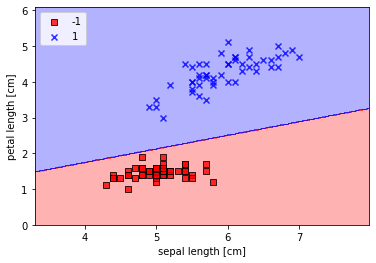

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

Using the above, give code that plots the decision regions for the first 5 epochs. Use learning rate = 0.01 and random seed = 1 when applicable.

Iteration number: 1


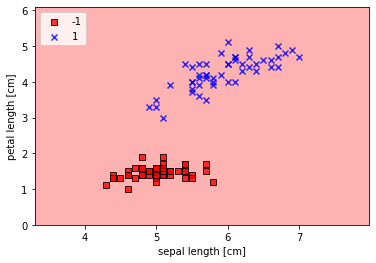

Iteration number: 2


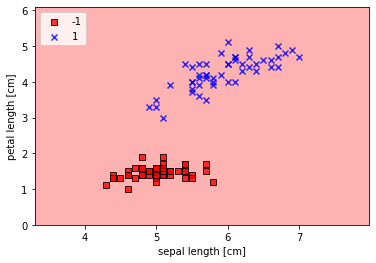

Iteration number: 3


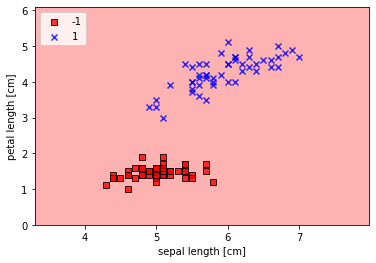

Iteration number: 4


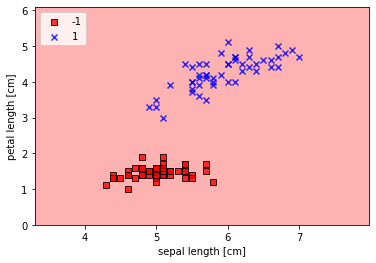

Iteration number: 5


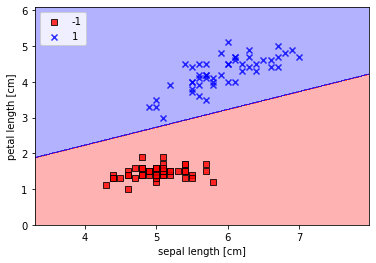

In [ ]:

#
# with eta=0.01 all 5 plots will be the same
# with eta=0.1 we get a different picture where the 5th plot shows the correct separation


# Established a list of classifiers for 5 epochs
cl = []
# number of iterations to plot
iter_plot = 5
for i in range(0,iter_plot):
    # create a perceptron
    classifier = Perceptron(eta=0.1, n_iter = i, random_state=1, init_weight=[0.1,0.2,-0.1]);
    # train the perceptron created
    classifier.fit(X,y)
    # store the trained perceptron into the predefined list
    cl.append(classifier)

# Plot based on classified gathered
for idx,c in enumerate(cl):
    print('Iteration number: {}'.format(idx+1))
    plot_decision_regions(X, y, classifier=c)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

## <font color = 'blue'> Question 4: Changing the data order in training </font>

max score: 12

The data arrays (X,y) currently in the memory are organized so that the all data points with a given label (e.g. 'Setosa') lie in a contiguous part of the arrays (X,y). In this question we will check the impact of changing the order of the data in the number of iterations required to learn a correct perceptron. 


The commented code below needs a small change in order to generate a random shuffle (also called permutation) of the data). Please look up the particular functions of the code, see how they work and then do the required modification and uncomment/evaluate the code. 

In [ ]:
# establish a random shuffle
s = np.arange(len(y))
np.random.shuffle(s)
#shuffle sample
X_shuffle = X[s];
y_shuffle = y[s];

Modify the code below as follows: <br>
(i) Pick a sufficiently small $\eta$ so that convergences takes 20 iterations or more <br>
(ii) Add an extra line that fits the perceptron on the shuffled data <br>
(iii) Plot the error for both training processes (the original, and the shuffled ata) 

What do you observe?

### Note to grader: It is okay to create another perceptron and just fit X_shuffle, y_shuffle using the new perceptron

> Indented block



Contiguous labeled data requires 40 iterations


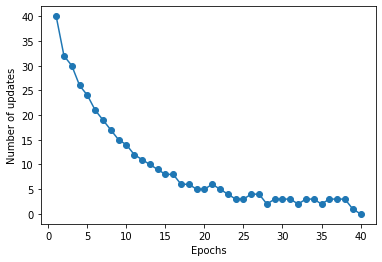

Shuffled data requires 18 iterations


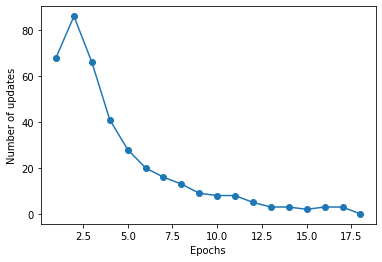

In [ ]:
# (i) From an answer above, we know that when eta = 0.00001, when the data is feed subsequently, it will require 40 iterations.
# try this eta on the shuffed data
ppn = Perceptron(eta = 0.00001)
ppn.fit(X, y)
print('Contiguous labeled data requires {} iterations'.format(ppn.iter_trained))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

# (ii) Add a code line that fits the perceptron on the shuffled data
ppn.fit(X_shuffle, y_shuffle)
print('Shuffled data requires {} iterations'.format(ppn.iter_trained))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

# <font color='blue'>Question 5: Understanding linear transformations </font>

max score: 4

Suppose we have a 2-dimensional data set. Then we transform each data point $x^{(j)} = (x_1^{(j)}, x_2^{(j)})$ as follows: $\tilde{x^{(j)}} = ( a x_1^{(j)}- c, b x_2^{(j)}-c)$, where $a,b,c$ are constant numbers. This is a linear transformation, because our transformed data comes from simple operations that use 'first powers' of the original data. 


If our given data set is linearly separable, is the same true for the transformed one? In the following cells you can plot a transformed version of the Iris dataset, so that you see how it behaves (for your choice of $a, b, c$.) But you should also try and justify your answer in a theoretical way: if there exists a  'good' perceptron for the original data set, what would be the weights for the perceptron that works on the transformed set?

In [ ]:
# Yes. See the plot of the transformed data
# First recall how X looks like. First 5 records
X[0:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [ ]:
# Pick a, b, c as follows
a, b, c = np.random.randint(low=1, high=10, size=3)

In [ ]:
# transform X
X1 = np.array(a*X[:,0] - c)
X2 = np.array(b*X[:,1] - c)
X_new = np.stack((X1,X2), axis=-1)
X_new[0:5]

array([[38.8,  3.6],
       [37.2,  3.6],
       [35.6,  3.2],
       [34.8,  4. ],
       [38. ,  3.6]])

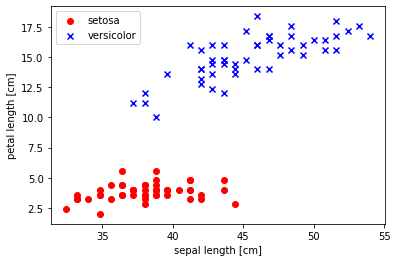

In [ ]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X_new = X_new[0:100]

# plot data
plt.scatter(X_new[:50, 0], X_new[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_new[50:100, 0], X_new[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_06.png', dpi=300)
plt.show()

If our given data set is linearly separable, the same is true for the transformed one since this is a linear transformation.

In [ ]:
# Observe the weights of the newly transform data set
ppn = Perceptron(eta = 0.00001)
ppn.fit(X, y)
w_old = ppn.w_
print(w_old)
ppn.fit(X_new, y)
print(ppn.w_)
print(ppn.w_[0])

[ 0.01528345 -0.00469356  0.00374228]
[ 0.01632345 -0.00203956  0.00179028]
0.016323453636632415


If there exists a 'good' perceptron for the original data set, the weights for the perceptron that works on the transformed set can be as follows:
Assume that we get the 'good' weight vector from the original dataset: $w_0, w_1, w_2$. 
The net input when assigning the label correctly for all data points will satisfy the following for all data point labeled '1'<br><br>
net_input $= w_0 + w_1x_1 + w_2x_2 >= 0$ (1)
<br><br>

In the same way, for the transformed data, we have
The net input when assigning the label correctly for all data points will satisfy the following for all data point labeled '1'<br><br>
net_input $= w'_0 + w'_1x_1 + w'_2x_2 >= 0$ or $w'_0 - c(w'_1 + w'_2) + w'_1ax_1 + w'_2bx_2 >= 0$ (2)
<br><br>

(1) and (2) show that one possible weight set that will satisfy the transformed data would be <br>
$w'_2 = w_2/b$<br>
$w'_1 = w_1/a$<br>
$w'_0 = w_0 + c(w_1/a + w_2/b)$

Let's take a look at actual data to demonstrate the above

In [ ]:
# apply to our transformed data
w_new_0 = w_old[0]+c*(w_old[1]/a+w_old[2]/b)
w_new_1 = w_old[1]/a
w_new_2 = w_old[2]/b
w_new = [w_new_0, w_new_1, w_new_2]

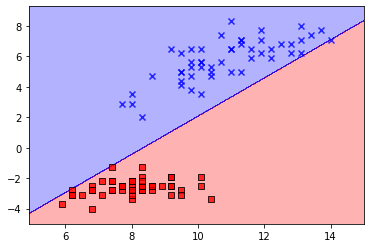

In [ ]:
# setup marker generator and color map
def predict(X):
    """Return class label after unit step"""
    return np.where(np.dot(X, w_new[1:]) + w_new[0] >= 0.0, 1, -1)

resolution = 0.02
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

# plot the decision surface
x1_min, x1_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
x2_min, x2_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
Z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class examples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X_new[y == cl, 0], 
                y=X_new[y == cl, 1],
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=cl, 
                edgecolor='black')